In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from EMG_Step_Extr_Pipeline import EMGProcessor
import pandas as pd

from Data_Segmentation import Data_Segmentor
from Step_Extraction_Stats import Step_Extraction_Stats
import math
from scipy.signal import find_peaks


In [2]:
defaultDelsysAttachments = ['TAL', 'TAR', 'LGL', 'LGR', 'VLL', 'VLR', 'BFL', 'BFR','None', 'None', 'None', 'None', 'None', 'LK', 'RK']
#Trials 1-2 are test trials
# Trials 4-7 are real trials
# Trial 6 is a dud
Trial4File = h5py.File("Trial 4.h5")
Trial5File = h5py.File("Trial 5.h5")
Trial6File = h5py.File("Trial 6.h5")
Trial7File = h5py.File("Trial 7.h5")

Trial4File.keys()

<KeysViewHDF5 ['Foot 1', 'Foot 2', 'Sensor 1', 'Sensor 14', 'Sensor 15', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']>

# Parsing Trial Data into Usable Dataframes

In [3]:
# Data Segmentation for Trial 4
dataSegmTrial4 = Data_Segmentor()

dataSegmTrial4.parseData(Trial4File)

dataSegmTrial4.filt_rect_smooth_EMG()

rawEMGdf4 = dataSegmTrial4.getEMGData()
filtEMGdf4 = dataSegmTrial4.get_filt_rect_smooth_emg()

dataSegmTrial4.bin_pressure_data()
binnedPressData4 = dataSegmTrial4.get_binned_pressure_data()

In [4]:
# Data Segmentation for Trial 5
dataSegmTrial5 = Data_Segmentor()

dataSegmTrial5.parseData(Trial5File)

dataSegmTrial5.filt_rect_smooth_EMG()

rawEMGdf5 = dataSegmTrial5.getEMGData()
filtEMGdf5 = dataSegmTrial5.get_filt_rect_smooth_emg()

dataSegmTrial5.bin_pressure_data()
binnedPressData5 = dataSegmTrial5.get_binned_pressure_data()

In [5]:
# Data Segmentation for Trial 7
dataSegmTrial7 = Data_Segmentor()

dataSegmTrial7.parseData(Trial7File)

dataSegmTrial7.filt_rect_smooth_EMG()

rawEMGdf7 = dataSegmTrial7.getEMGData()
filtEMGdf7 = dataSegmTrial7.get_filt_rect_smooth_emg()

dataSegmTrial7.bin_pressure_data()
binnedPressData7 = dataSegmTrial7.get_binned_pressure_data()

# Extracting All EMG Steps from the Dataframes

In [6]:
# Step extraction for Trial 4
stepExtr4 = Step_Extraction_Stats()
trial4StepsLDf = stepExtr4.extract_steps(binnedPressData4, filtEMGdf4, "RearfootL")

trial4StepsRDf = stepExtr4.extract_steps(binnedPressData4, filtEMGdf4, "RearfootR")



43
43
42
43
41
43
42
42
41
42
40
42
39
42
38
42


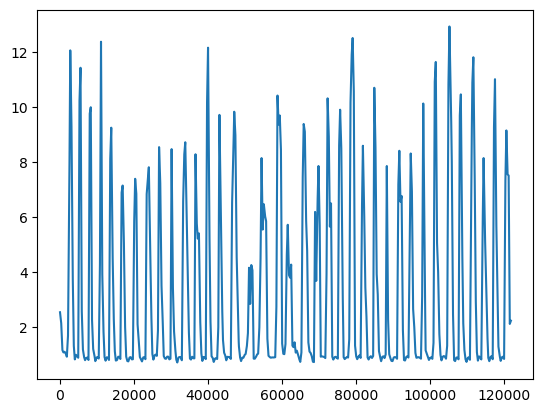

In [7]:
plt.plot(stepExtr4.upSampleData)

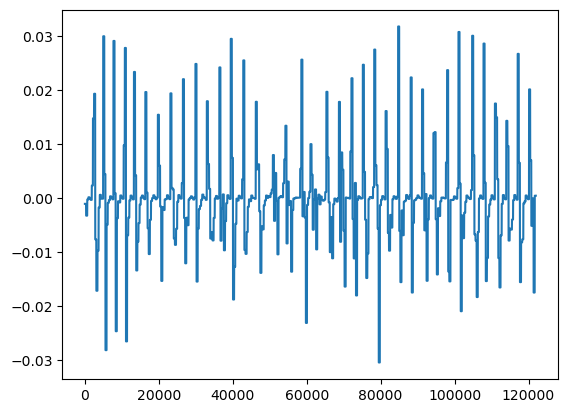

In [8]:
plt.plot(stepExtr4.upSampledPressDataSlope)

In [9]:
stepExtr4.pressDataInfl

[1847,
 4927,
 7699,
 10471,
 13243,
 16323,
 19711,
 23099,
 26179,
 29875,
 32955,
 36343,
 39423,
 42503,
 46199,
 50511,
 53591,
 58211,
 60983,
 65295,
 68683,
 71763,
 75151,
 77923,
 81311,
 84699,
 88087,
 91167,
 94247,
 97635,
 100715,
 104719,
 107799,
 110879,
 113959,
 117039,
 120119]

(110000.0, 120000.0)

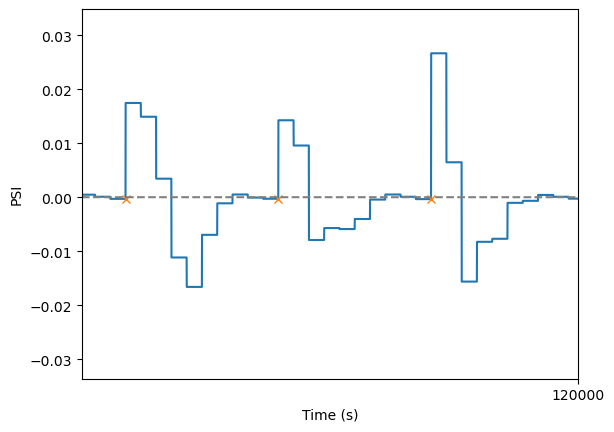

In [13]:
slopeData = stepExtr4.upSampledPressDataSlope
inflPoints = stepExtr4.pressDataInfl

data = slopeData#[30:40]
#peaks, _ = find_peaks(binnedPressureDataDf['HalluxL'], height=0.1, distance = 1500)
#peaks, _ = find_peaks(binnedPressureDataDf['HalluxL'], distance = 5, height = 1)


xTicks = np.linspace(0, len(data), len(data))
xTicks = xTicks/10

f, ax = plt.subplots(1)

ax.plot(data)
ax.plot(inflPoints, data[inflPoints], "x")
ax.plot(np.zeros_like(data), "--", color="gray")
plt.xlabel("Time (s)")
plt.ylabel("PSI")
#plt.legend(["RTA", "LTA"])
ticks = np.linspace(0, 120000, 10)
plt.xticks(ticks)
ax.set_xlim(xmin=110000, xmax=120000)

In [13]:
# Step extraction for Trial 5
stepExtr5 = Step_Extraction_Stats()
trial5StepsLDf = stepExtr5.extract_steps(binnedPressData5, filtEMGdf5, "RearfootL")

trial5StepsRDf = stepExtr5.extract_steps(binnedPressData5, filtEMGdf5, "RearfootR")


/Users/marth/anaconda3/envs/my_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/marth/anaconda3/envs/my_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(120.0, 300.0)

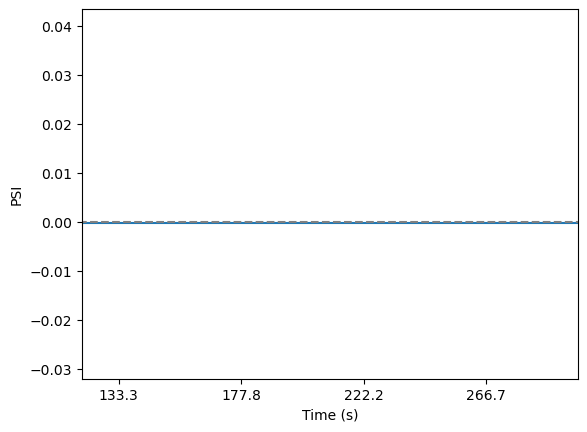

In [14]:
slopeData = stepExtr5.upSampledPressData
inflPoints = stepExtr5.pressDataInfl

data = slopeData#[30:40]
#peaks, _ = find_peaks(binnedPressureDataDf['HalluxL'], height=0.1, distance = 1500)
#peaks, _ = find_peaks(binnedPressureDataDf['HalluxL'], distance = 5, height = 1)


xTicks = np.linspace(0, len(data), len(data))
xTicks = xTicks/10

f, ax = plt.subplots(1)

ax.plot(data)
ax.plot(inflPoints, data[inflPoints], "x")
ax.plot(np.zeros_like(data), "--", color="gray")
plt.xlabel("Time (s)")
plt.ylabel("PSI")
#plt.legend(["RTA", "LTA"])
ticks = np.linspace(0, 400, 10)
plt.xticks(ticks)
ax.set_xlim(xmin=120, xmax=300)

In [8]:
# Step extraction for Trial 7
stepExtr7 = Step_Extraction_Stats()
trial7StepsLDf = stepExtr7.extract_steps(binnedPressData7, filtEMGdf7, "RearfootL")

trial7StepsRDf = stepExtr7.extract_steps(binnedPressData7, filtEMGdf7, "RearfootR")

# Plotting Mean and Std from All Steps for Each Muscle Using Inflection Point

IndexError: index 0 is out of bounds for axis 0 with size 0

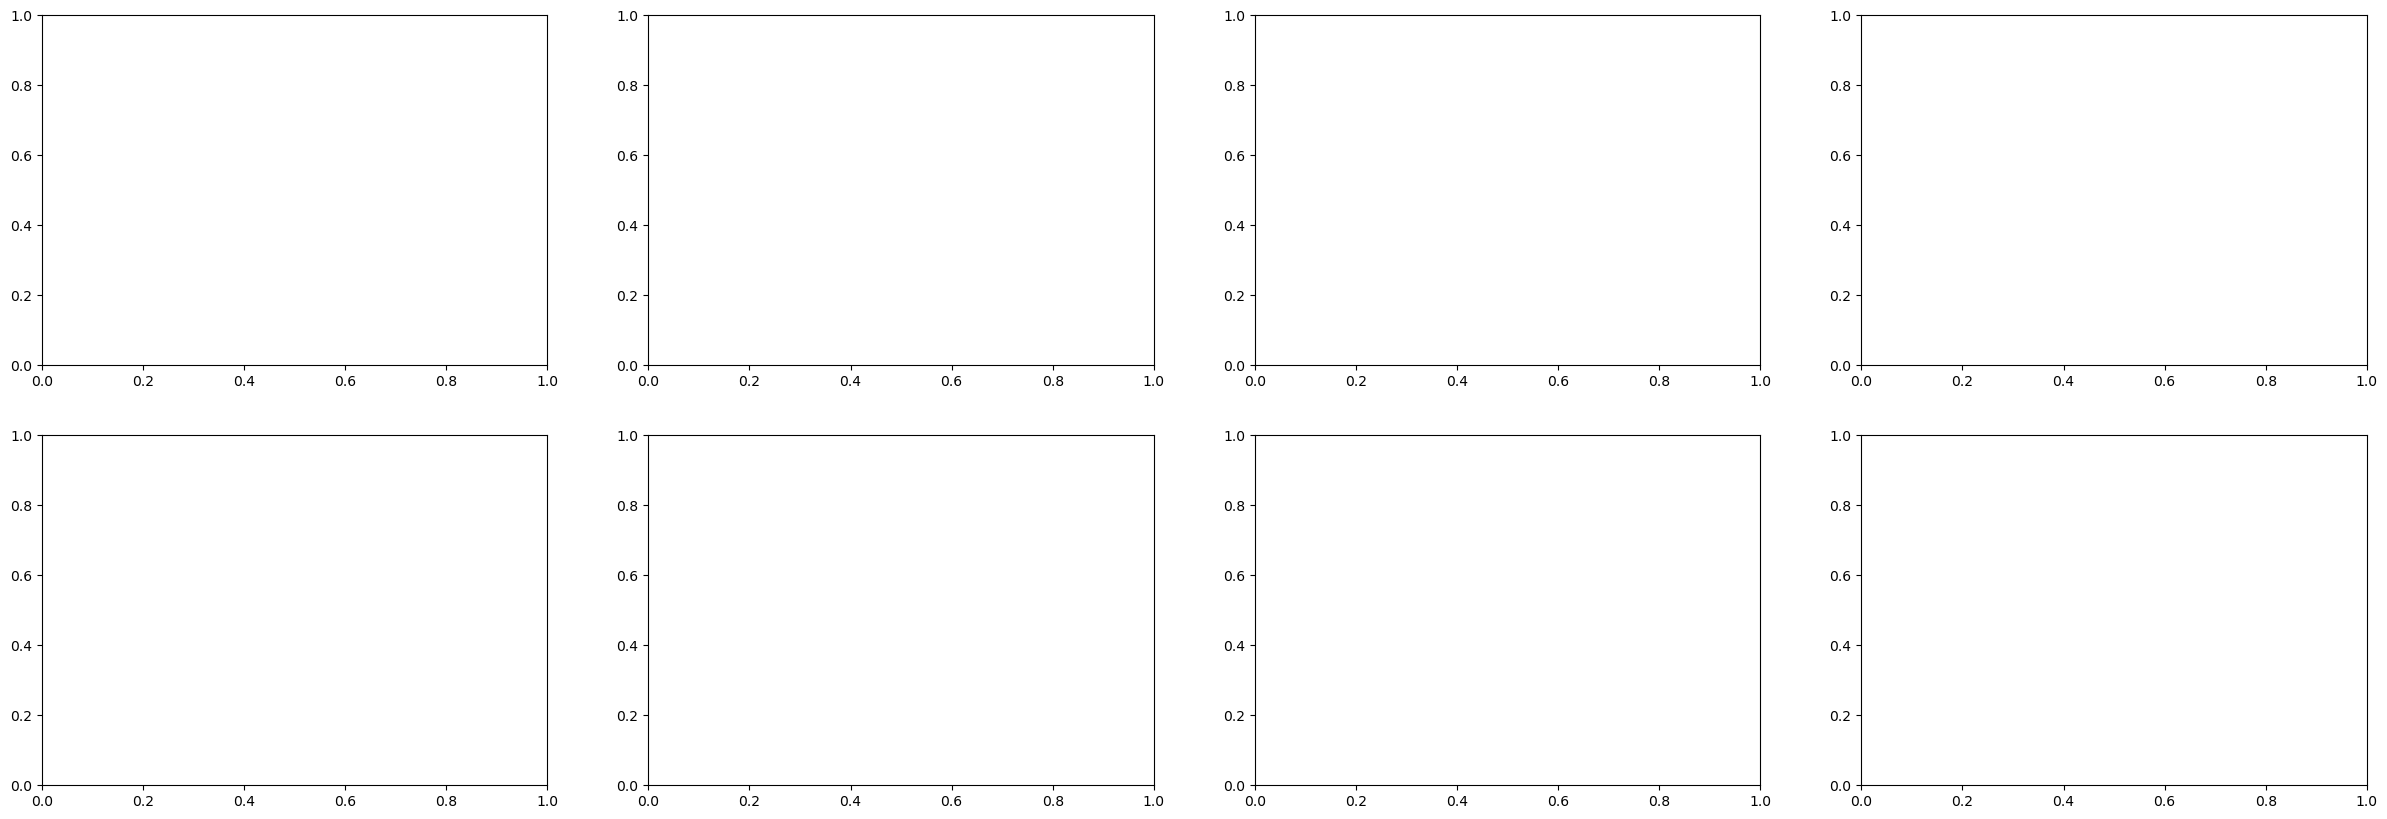

In [11]:
inputDfL = trial4StepsLDf
inputDfR = trial4StepsRDf

combinedCols = inputDfL.columns.values
combinedCols = np.append(combinedCols, inputDfR.columns.values)

i,j=0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(2,PLOTS_PER_ROW, figsize=(30, 10))
iter = 0

for col in combinedCols:
    if (col[len(col) - 1:len(col)] == "L"):
        subset = inputDfL[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 4 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    else:
        subset = inputDfR[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 4 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    iter += 1

plt.show()

# Plotting Mean and Std from All Steps for Each Muscle Using Peaks

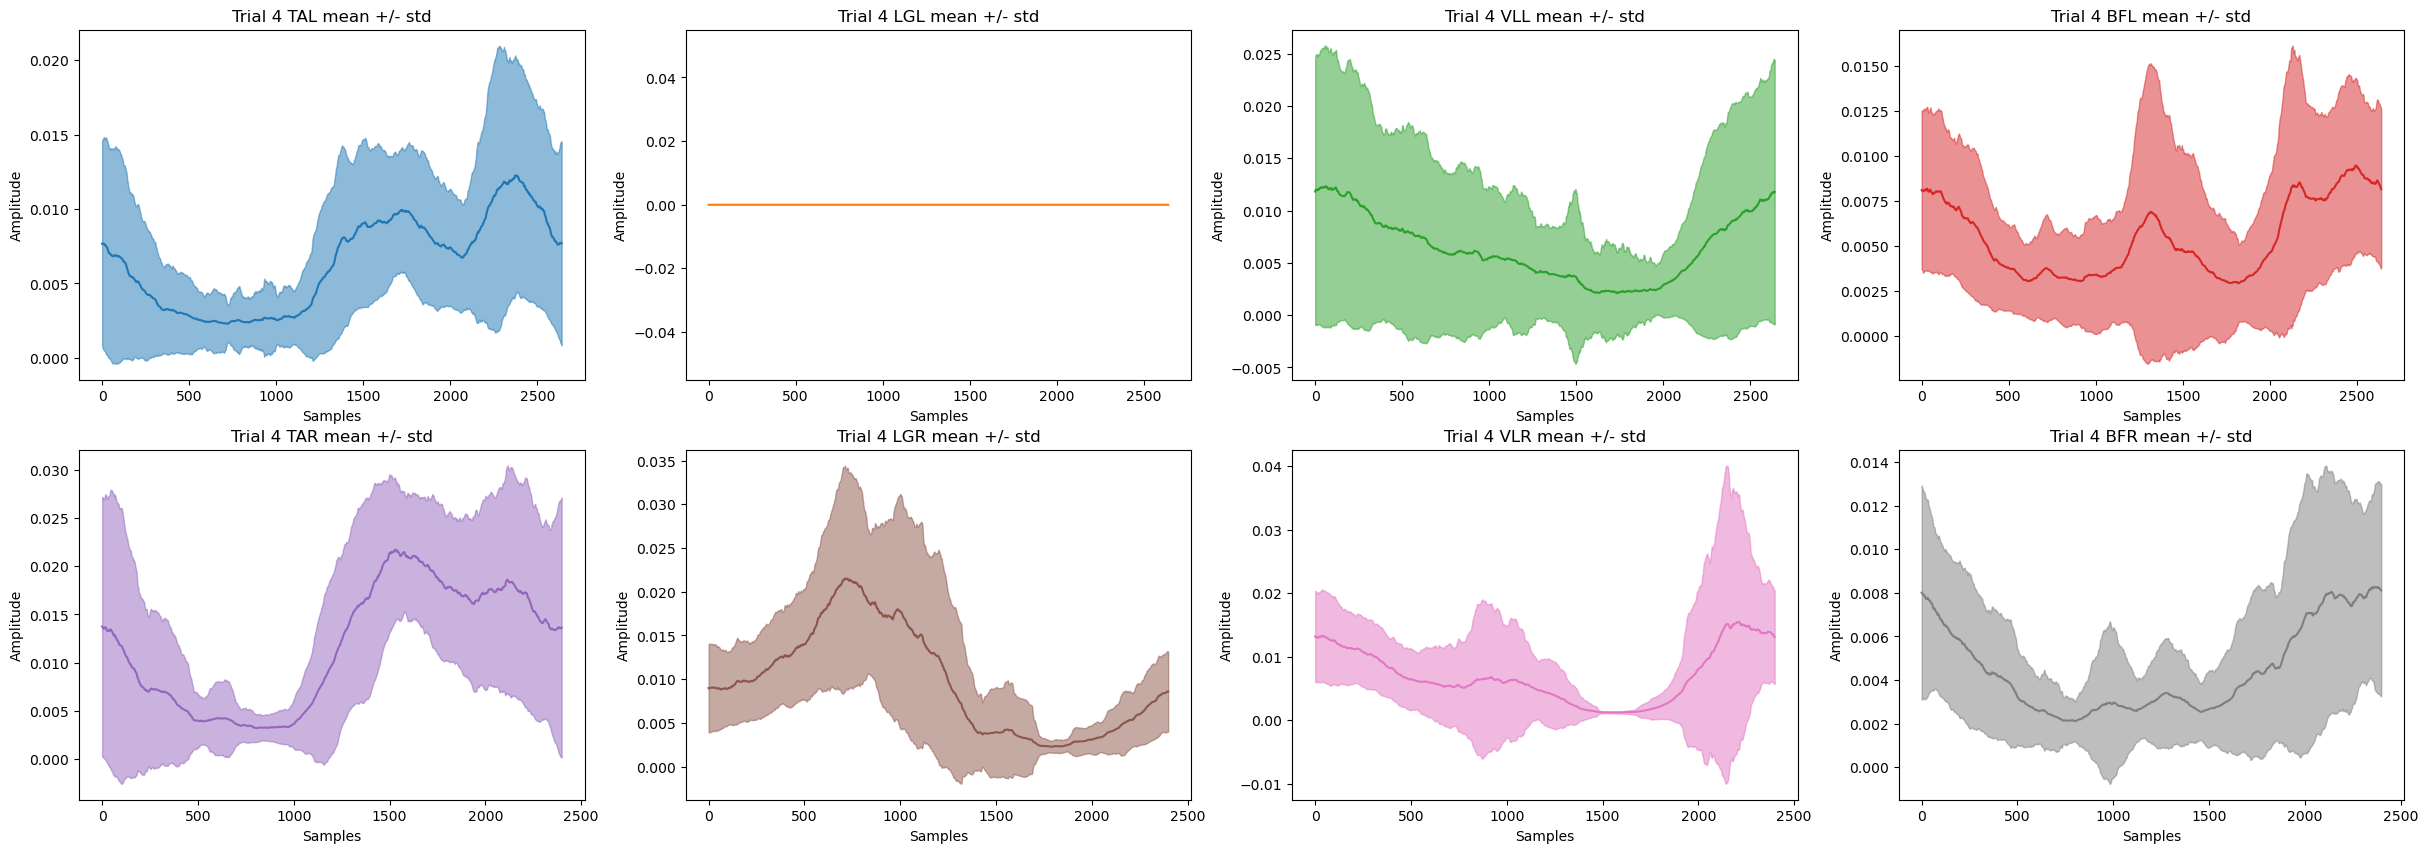

In [11]:
inputDfL = trial4StepsLDf
inputDfR = trial4StepsRDf

combinedCols = inputDfL.columns.values
combinedCols = np.append(combinedCols, inputDfR.columns.values)

i,j=0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(2,PLOTS_PER_ROW, figsize=(30, 10))
iter = 0

for col in combinedCols:
    if (col[len(col) - 1:len(col)] == "L"):
        subset = inputDfL[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 4 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    else:
        subset = inputDfR[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 4 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    iter += 1

plt.show()

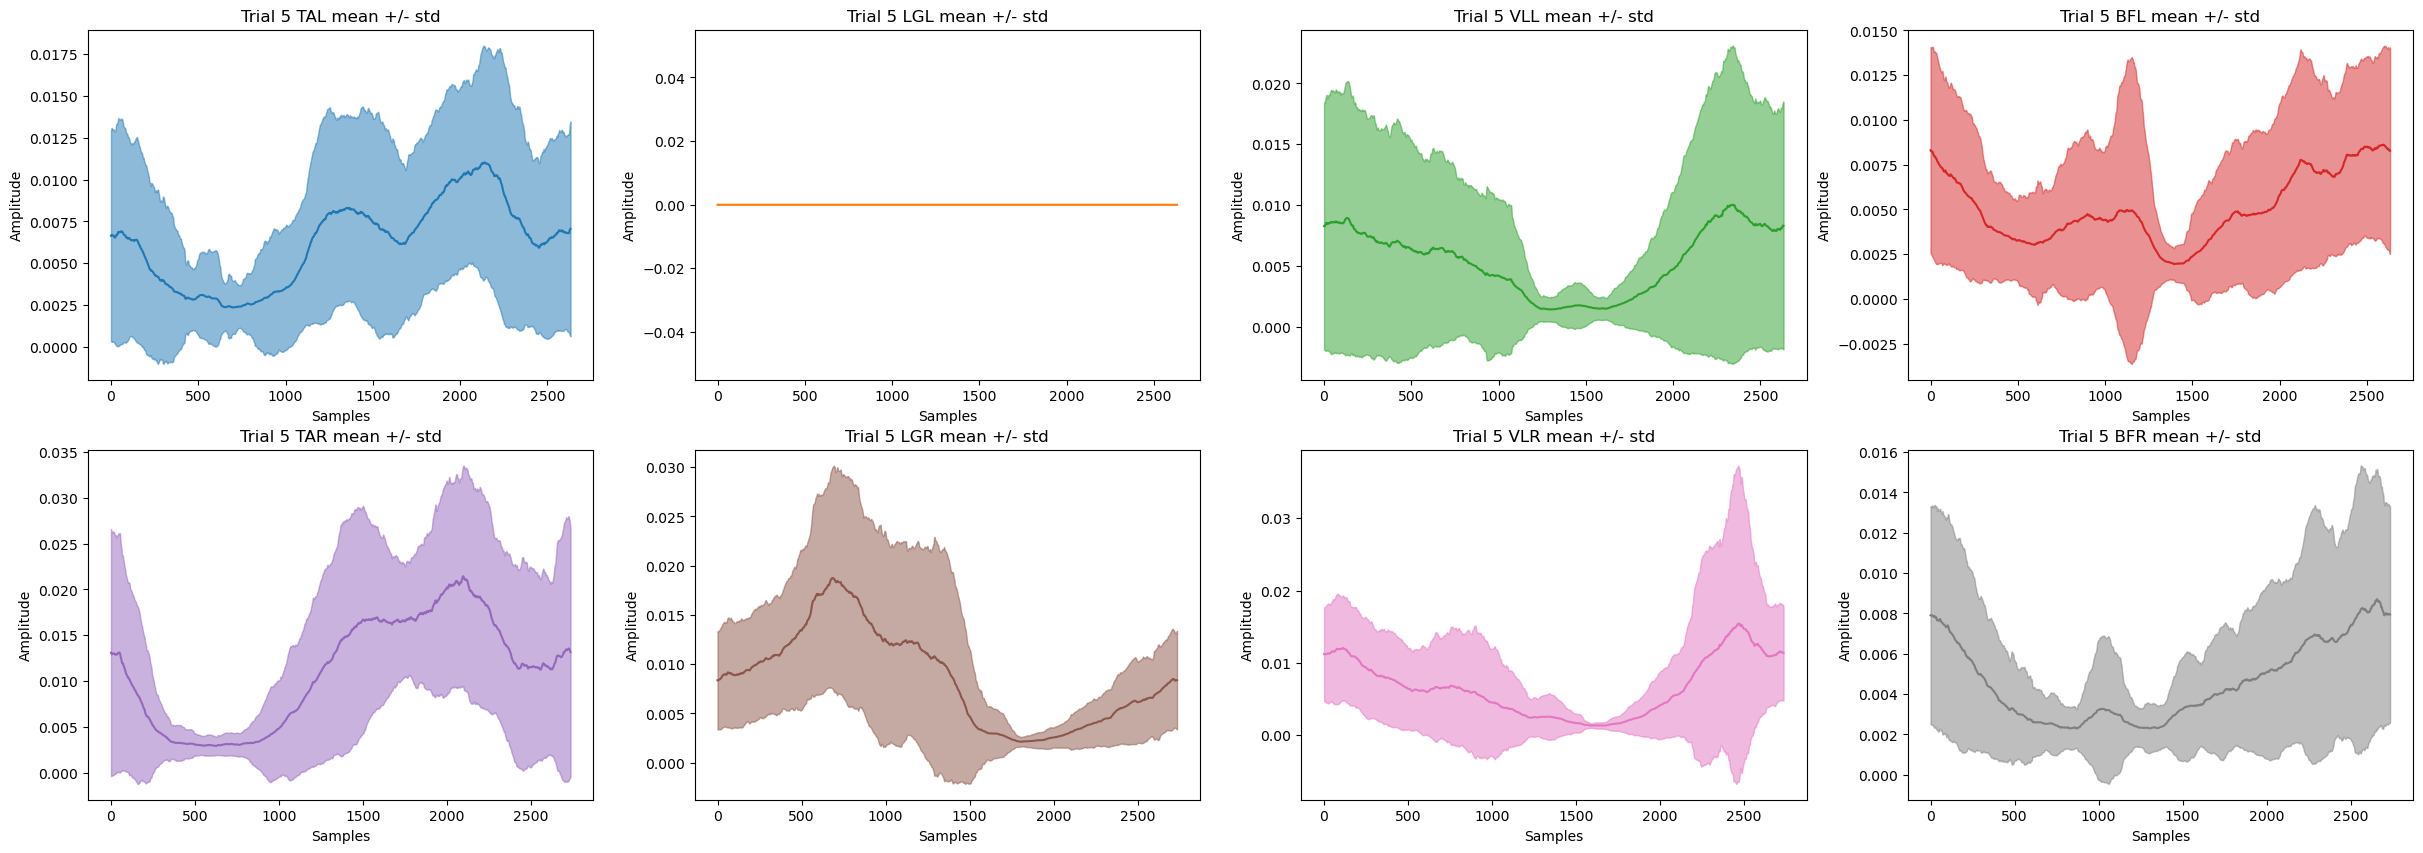

In [79]:
inputDfL = trial5StepsLDf
inputDfR = trial5StepsRDf

combinedCols = inputDfL.columns.values
combinedCols = np.append(combinedCols, inputDfR.columns.values)

i,j=0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(2,PLOTS_PER_ROW, figsize=(30, 10))
iter = 0

for col in combinedCols:
    if (col[len(col) - 1:len(col)] == "L"):
        subset = inputDfL[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 5 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    else:
        subset = inputDfR[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 5 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    iter += 1

plt.show()

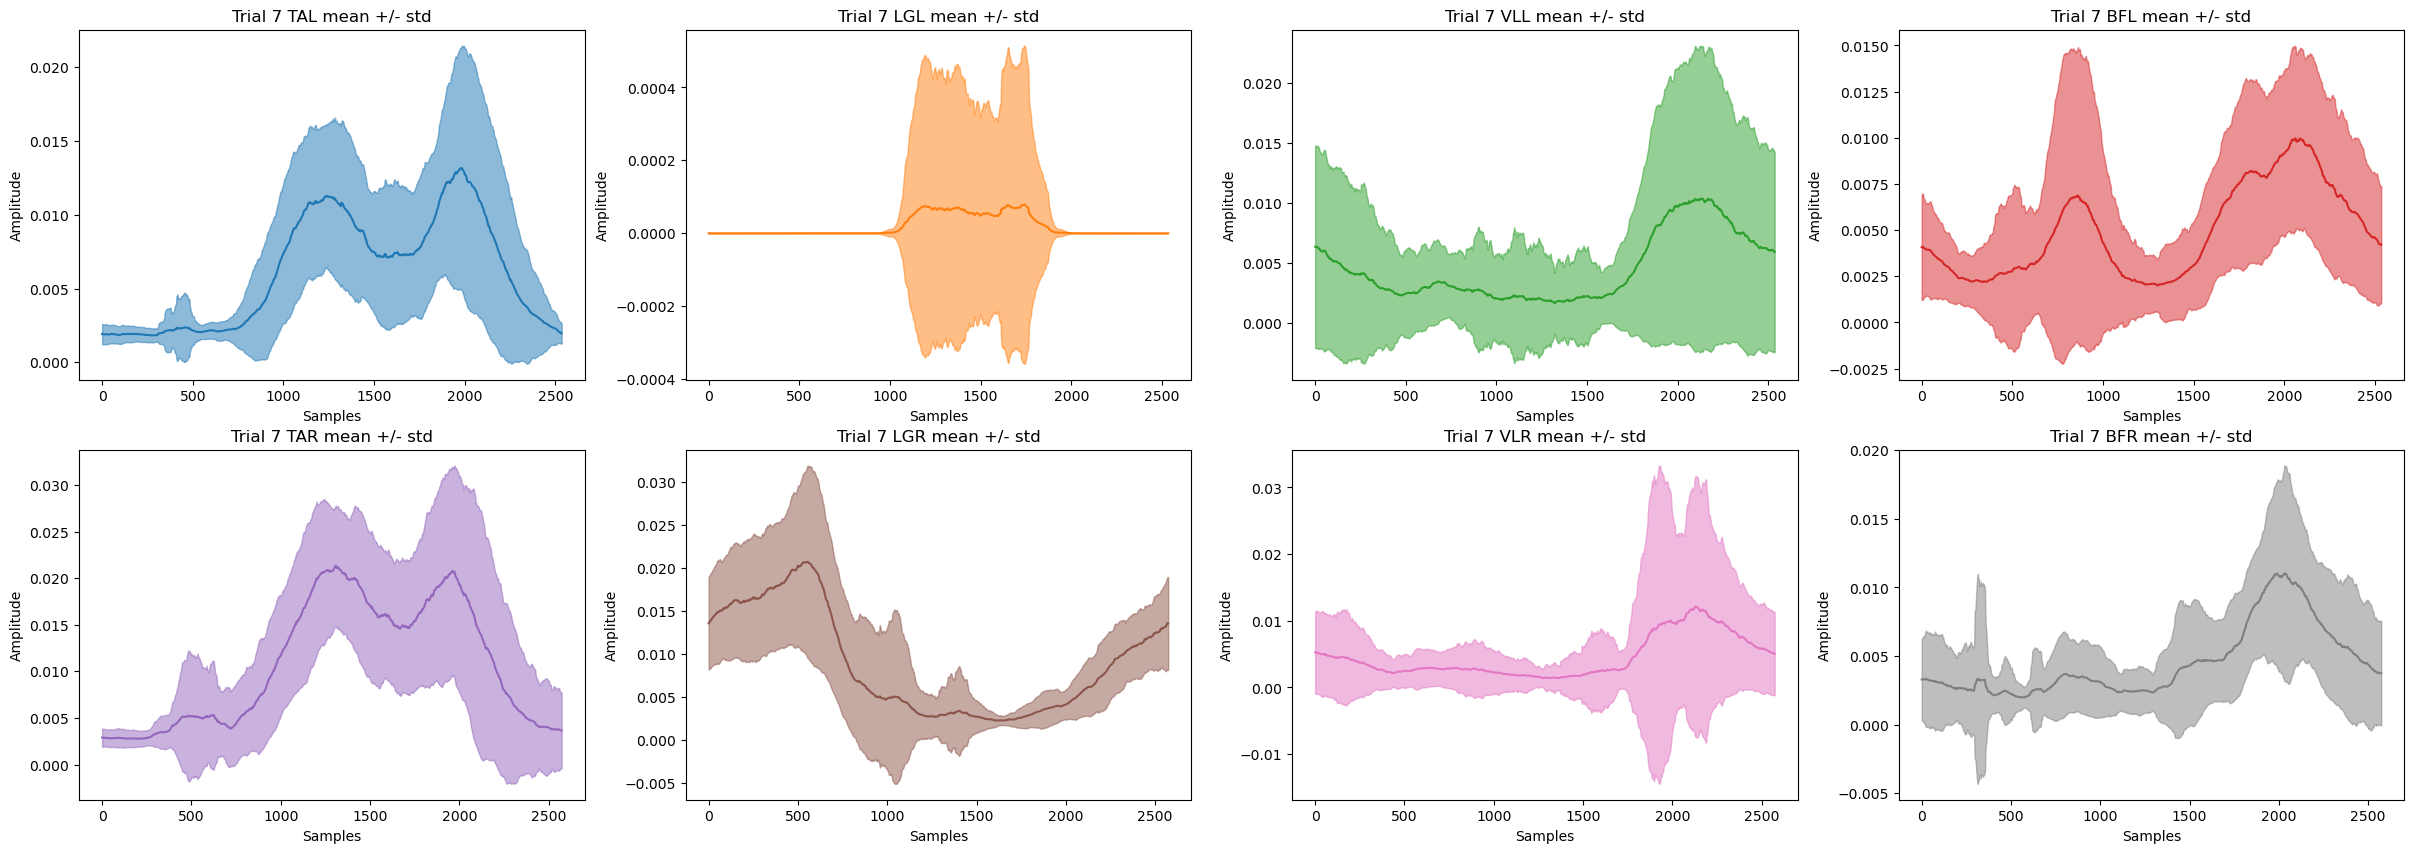

In [81]:
inputDfL = trial7StepsLDf
inputDfR = trial7StepsRDf

combinedCols = inputDfL.columns.values
combinedCols = np.append(combinedCols, inputDfR.columns.values)

i,j=0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(2,PLOTS_PER_ROW, figsize=(30, 10))
iter = 0

for col in combinedCols:
    if (col[len(col) - 1:len(col)] == "L"):
        subset = inputDfL[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 7 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    else:
        subset = inputDfR[col].to_numpy()
        meanPerCol = np.mean(subset, axis = 0)
        stdPerCol = np.std(subset, axis = 0)

        x = np.arange(len(subset[0]))
        y1 = meanPerCol + stdPerCol
        y2 = meanPerCol - stdPerCol
        y3 = meanPerCol
        
        axs[i][j].plot(x, y3, color = "C{}".format(iter))
        axs[i][j].fill_between(x, y1, y2, alpha = 0.5, color = "C{}".format(iter))
        axs[i][j].set_title('Trial 7 {} mean +/- std'.format(col))
        axs[i][j].set_xlabel('Samples')
        axs[i][j].set_ylabel('Amplitude')

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    iter += 1

plt.show()